# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [ ]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

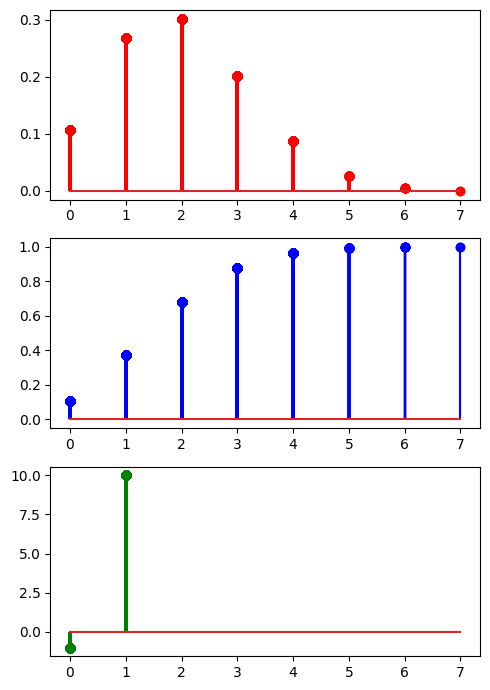

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

Distribución Normal

Probability density that a Normal(0, 1) takes the value 2: 0.05399096651318806
Probability that a Normal(0, 1) will take a value less than 2: 0.9772498680518208
Which value of a Normal(0, 1) has a cumulative probability of 0.9? 1.2815515655446004
Generate 2000 random values from a Normal(0, 1) distribution: [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


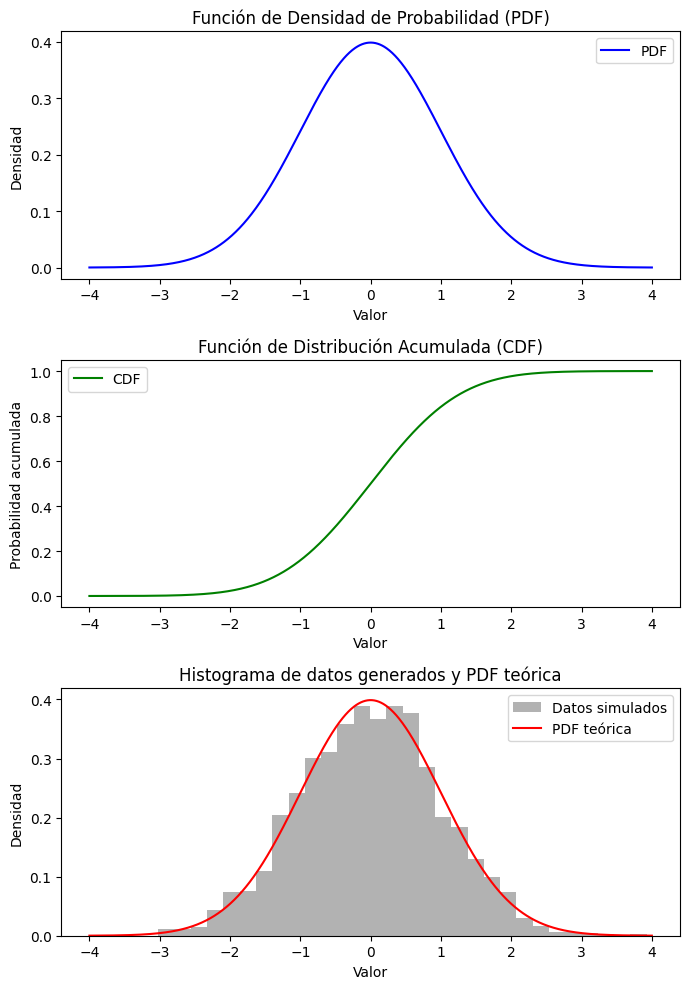

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dnorm(x, mean=0, sd=1):
    """
    Calcula la estimación puntual de la distribución normal.
    """
    result = norm.pdf(x, loc=mean, scale=sd)
    return result

def pnorm(q, mean=0, sd=1):
    """
    Calcula el acumulado de la distribución normal.
    """
    result = norm.cdf(q, loc=mean, scale=sd)
    return result

def qnorm(p, mean=0, sd=1):
    """
    Calcula la función cuantil a partir de la distribución normal.
    """
    result = norm.ppf(p, loc=mean, scale=sd)
    return result

def rnorm(n, mean=0, sd=1):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result = norm.rvs(loc=mean, scale=sd, size=n)
    return result

# Fijar la semilla para la reproducibilidad
np.random.seed(42)

print(f"Probability density that a Normal(0, 1) takes the value 2: {dnorm(2, mean=0, sd=1)}")
print(f"Probability that a Normal(0, 1) will take a value less than 2: {pnorm(2, mean=0, sd=1)}")
print(f"Which value of a Normal(0, 1) has a cumulative probability of 0.9? {qnorm(0.9, mean=0, sd=1)}")
print(f"Generate 2000 random values from a Normal(0, 1) distribution: {rnorm(2000, mean=0, sd=1)}")

# Generar datos a partir de la distribución normal
data = rnorm(2000, mean=0, sd=1)

# Crear un rango de valores para la visualización
x = np.linspace(-4, 4, 1000)

# Calcular PDF y CDF para visualización
pdf = dnorm(x, mean=0, sd=1)
cdf = pnorm(x, mean=0, sd=1)

# Crear la figura y los ejes
fig, axis = plt.subplots(3, 1, figsize=(7, 10))

# Graficar la PDF
axis[0].plot(x, pdf, label='PDF', color='blue')
axis[0].set_title('Función de Densidad de Probabilidad (PDF)')
axis[0].set_xlabel('Valor')
axis[0].set_ylabel('Densidad')
axis[0].legend()

# Graficar la CDF
axis[1].plot(x, cdf, label='CDF', color='green')
axis[1].set_title('Función de Distribución Acumulada (CDF)')
axis[1].set_xlabel('Valor')
axis[1].set_ylabel('Probabilidad acumulada')
axis[1].legend()

# Graficar histograma de los datos generados
axis[2].hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Datos simulados')
axis[2].plot(x, pdf, label='PDF teórica', color='red')
axis[2].set_title('Histograma de datos generados y PDF teórica')
axis[2].set_xlabel('Valor')
axis[2].set_ylabel('Densidad')
axis[2].legend()

plt.tight_layout()
plt.show()